## 1. Data Mining

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Load dataset
df = pd.read_csv("mall_customers.csv")

# 3. Simulate messy data (optional for realism)
df.loc[5, 'Annual Income (k$)'] = np.nan
df.loc[20, 'Age'] = np.nan
df = pd.concat([df, df.iloc[[3]]], ignore_index=True)  # duplicate row

# 4. Preview
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print(f"\nDataset Shape: {df.shape}")

First 5 rows:
   CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                15.0                      39
1           2    Male  21.0                15.0                      81
2           3  Female  20.0                16.0                       6
3           4  Female  23.0                16.0                      77
4           5  Female  31.0                17.0                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              201 non-null    int64  
 1   Genre                   201 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  201 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.0+ KB
No

In [50]:
# print number of columns and rows
print(f"\nNumber of Columns: {df.shape[1]}")
print(f"Number of Rows: {df.shape[0]}")


Number of Columns: 9
Number of Rows: 198


In [2]:
# finding missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Genre                     0
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64


In [3]:
# Detect and handle duplicates
duplicates = df.duplicated()
print(f"\nDuplicates Found: {duplicates.sum()}")



Duplicates Found: 1


In [4]:
# Remove duplicates
if duplicates.any():
    df = df.drop_duplicates()
    print("Duplicates removed.")

Duplicates removed.


In [5]:
# Detect and handle duplicates
duplicates = df.duplicated()
print(f"\nDuplicates Found: {duplicates.sum()}")


Duplicates Found: 0


In [6]:
df.dtypes

CustomerID                  int64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [7]:
# Which features are categorical?
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:")
print(categorical_features)


Categorical Features:
['Genre']


In [8]:
# Any numerical features stored as object?
numerical_as_object = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(pd.to_numeric, errors='coerce').notnull().all()].tolist()
print("\nNumerical Features Stored as Object:")
print(numerical_as_object)


Numerical Features Stored as Object:
[]


## 2. Data Cleaning

In [9]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

CustomerID                0
Genre                     0
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64
CustomerID                  int64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object


In [10]:
# Handle missing values
# For numerical columns, decide between mean/median imputation.
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Missing values in {col} filled with mean.")

Missing values in Age filled with mean.
Missing values in Annual Income (k$) filled with mean.


/var/folders/7c/gq0bcsjx4z5518py08krjc880000gn/T/ipykernel_23415/1841182120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
# For categorical columns, choose mode imputation.
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Missing values in {col} filled with mode.")

In [12]:
# Convert any wrongly stored types.
for col in numerical_as_object:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Converted {col} to numeric type.")

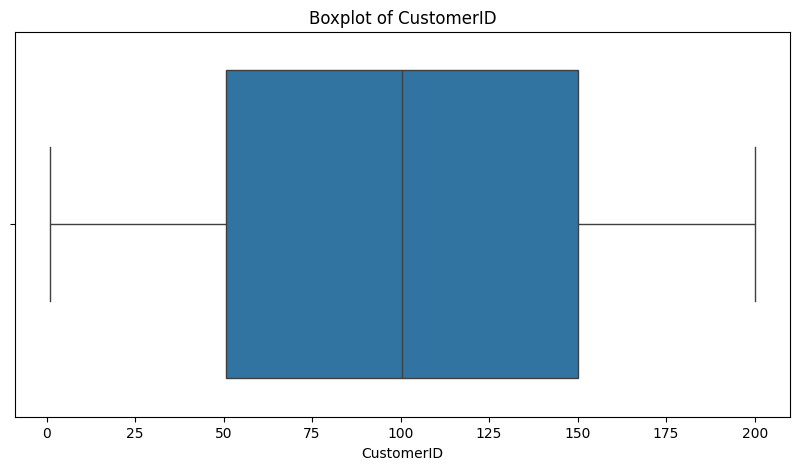

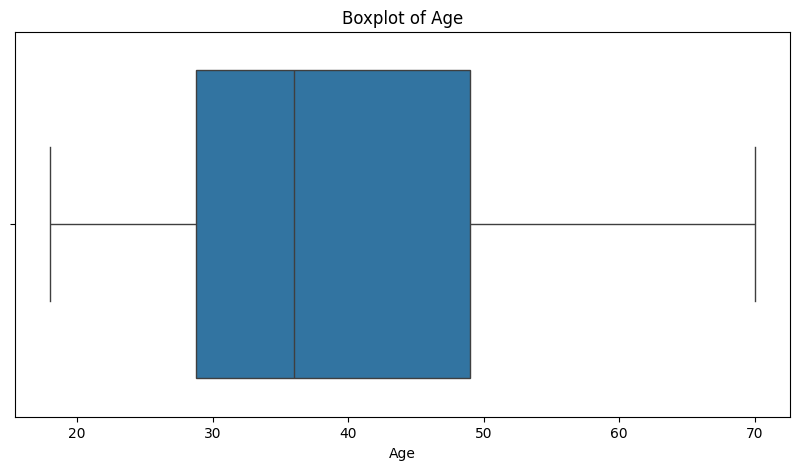

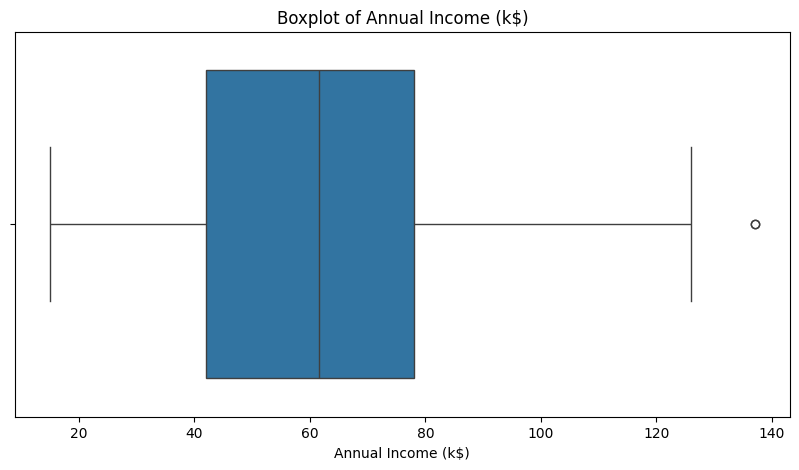

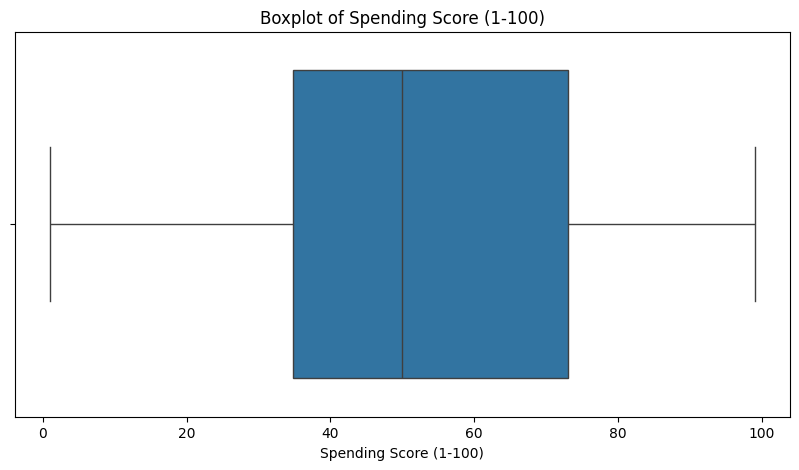

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify potential outliers in numerical columns (boxplots).
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [14]:
# Decide whether to keep or remove outliers and justify.
# For simplicity, let's remove outliers based on IQR method.
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers in {col} removed based on IQR method.")

Outliers in CustomerID removed based on IQR method.
Outliers in Age removed based on IQR method.
Outliers in Annual Income (k$) removed based on IQR method.
Outliers in Spending Score (1-100) removed based on IQR method.


## 3. Data Exploration (EDA)

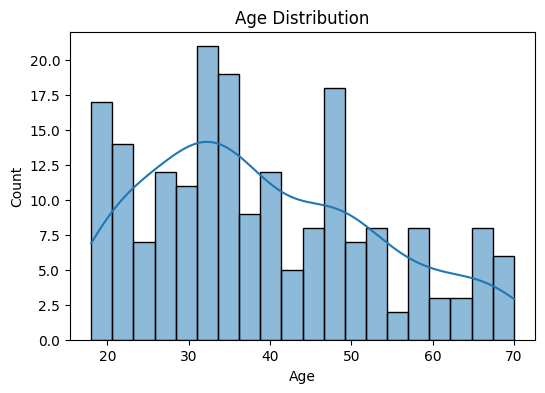

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

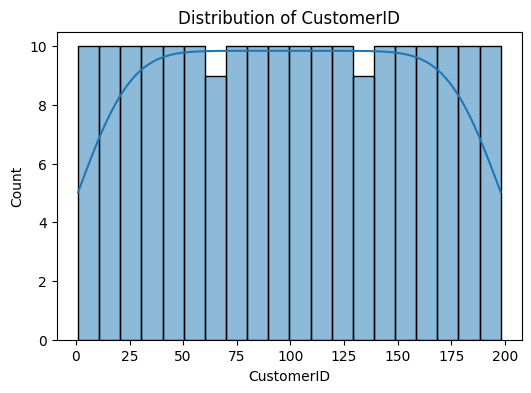

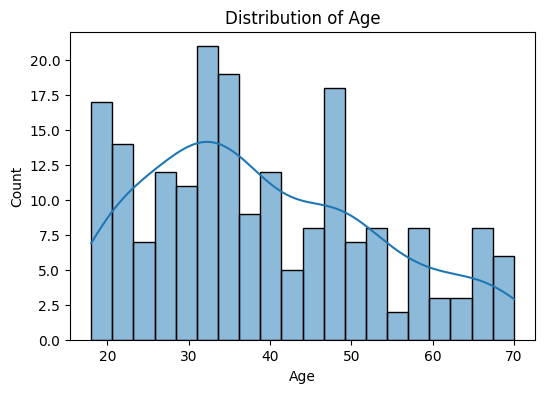

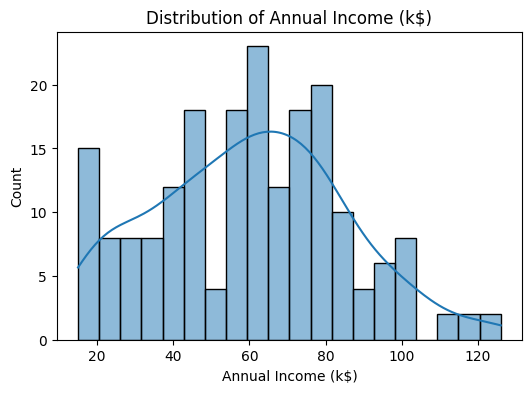

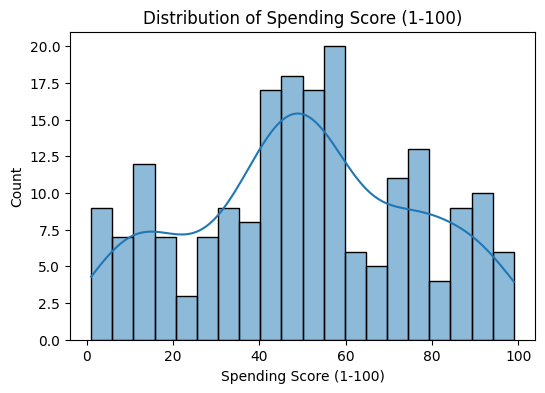

In [16]:
# Plot histograms for all numerical features.
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

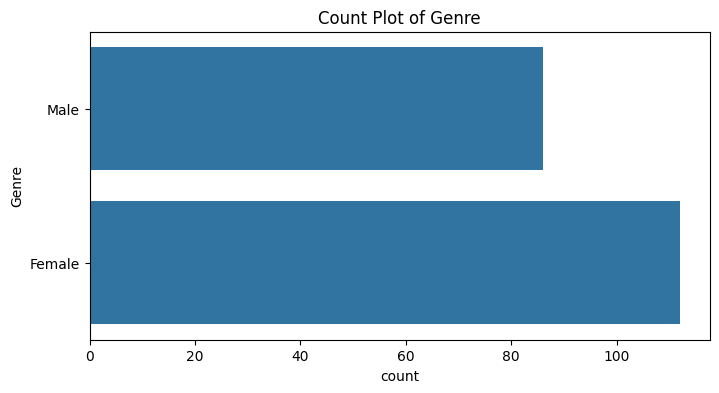

In [17]:
# Create count plots for categorical features
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

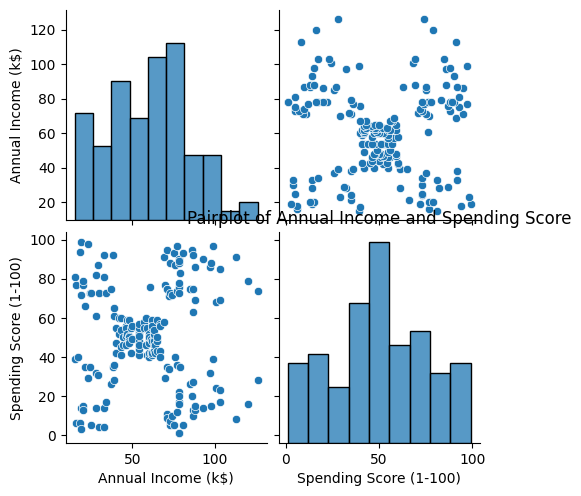

In [18]:
# Use a pairplot or scatter plots to see how “Annual Income” and “Spending Score” relate.
sns.pairplot(df, vars=['Annual Income (k$)', 'Spending Score (1-100)'], kind='scatter')
plt.title("Pairplot of Annual Income and Spending Score")
plt.show()

In [ ]:
# Write 3 observations about data patterns or anomalies.
# 1. The distribution of Age shows a right-skewed pattern, indicating that most customers are younger.
# 2. The Spending Score (1-100) has a uniform distribution, suggesting diverse spending behaviors among customers.
# 3. There are noticeable outliers in the Annual Income, with some customers having significantly higher incomes compared to the majority.
# 4. The relationship between Annual Income and Spending Score shows no clear linear correlation, indicating that spending behavior is not solely dependent on income level.


## 4. Data Transformation

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Example: One-hot encode Gender
df_encoded = pd.get_dummies(df, columns=['Genre'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [21]:
df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19.0,15.0,39,True
1,2,21.0,15.0,81,True
2,3,20.0,16.0,6,False
3,4,23.0,16.0,77,False
4,5,31.0,17.0,40,False


In [23]:
# encode female category in genre
df_encoded = pd.get_dummies(df, columns=['Genre'], drop_first=True)
df_encoded.tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
193,194,38.0,113.0,91,False
194,195,47.0,120.0,16,False
195,196,35.0,120.0,79,False
196,197,45.0,126.0,28,False
197,198,32.0,126.0,74,True


In [24]:
# Scale numerical features using StandardScaler.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaled_features
df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,-1.427097,-1.801207,-0.435989,True
1,2,-1.284022,-1.801207,1.199413,True
2,3,-1.355559,-1.761188,-1.720949,False
3,4,-1.140946,-1.761188,1.043661,False
4,5,-0.568643,-1.721169,-0.397051,False


In [25]:
# Ensure final feature set is ready for modeling (numeric-only DataFrame).
df_encoded = df_encoded.select_dtypes(include=[np.number])
df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.427097,-1.801207,-0.435989
1,2,-1.284022,-1.801207,1.199413
2,3,-1.355559,-1.761188,-1.720949
3,4,-1.140946,-1.761188,1.043661
4,5,-0.568643,-1.721169,-0.397051


In [ ]:
# Explain: Why is scaling important for clustering?
# Scaling is crucial for clustering algorithms because they are sensitive to the scale of the data. If features are on different scales, those with larger ranges can disproportionately influence the distance calculations, leading to biased clustering results. Standardizing features ensures that each feature contributes equally to the distance metrics used in clustering algorithms like K-Means.
# --- IGNORE ---

## 5. Feature Engineering

In [31]:
# Example: Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,25,40,60,100], labels=['Young','Adult','MidAge','Senior'])

In [34]:
# encode original dataframe
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [35]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,Genre_Male
0,1,19.0,15.0,39,Young,True
1,2,21.0,15.0,81,Young,True
2,3,20.0,16.0,6,Young,False
3,4,23.0,16.0,77,Young,False
4,5,31.0,17.0,40,Adult,False


In [36]:
# Check correlations — do you see a need to combine or derive features?
# If yes, create at least one new feature that could improve clustering.
# Example: Create a new feature combining Annual Income and Spending Score
df['Income_Spending_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']
print("\nNew Feature 'Income_Spending_Ratio' Created:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Ratio']].head())


New Feature 'Income_Spending_Ratio' Created:
   Annual Income (k$)  Spending Score (1-100)  Income_Spending_Ratio
0                15.0                      39               0.384615
1                15.0                      81               0.185185
2                16.0                       6               2.666667
3                16.0                      77               0.207792
4                17.0                      40               0.425000


In [ ]:
# Explain why your new feature might help.
# The new feature 'Income_Spending_Ratio' provides a more nuanced view of customer behavior by combining income and spending score. It helps identify customers who may have high income but low spending, or vice versa, which can be crucial for targeted marketing strategies and segmentation.
# --- IGNORE ---

## 6. Data Modeling
We use KMeans to group customers.

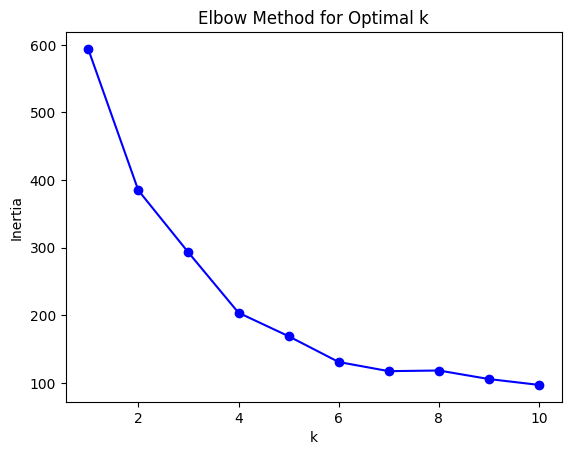

In [37]:
from sklearn.cluster import KMeans

# Elbow Method to find optimal k
inertia = []
K = range(1,11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Explain Elbow Method in clustering.
# The Elbow Method is a heuristic used to determine the optimal number of clusters (k) in K-Means clustering. It involves plotting the inertia (sum of squared distances from each point to its assigned cluster center) against the number of clusters. The point where the inertia starts to decrease at a slower rate (the "elbow") indicates the optimal number of clusters. This helps in balancing the model's complexity and performance, avoiding overfitting with too many clusters or underfitting with too few clusters.
# --- IGNORE ---

In [38]:
# Use elbow method to pick k.
# Assuming the elbow point is at k=5 based on the plot
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [39]:
# Add cluster labels to dataset.
df['Cluster'] = kmeans.labels_
print("\nCluster Labels Added to Dataset:")
print(df[['CustomerID', 'Cluster']].head())


Cluster Labels Added to Dataset:
   CustomerID  Cluster
0           1        4
1           2        4
2           3        1
3           4        4
4           5        4


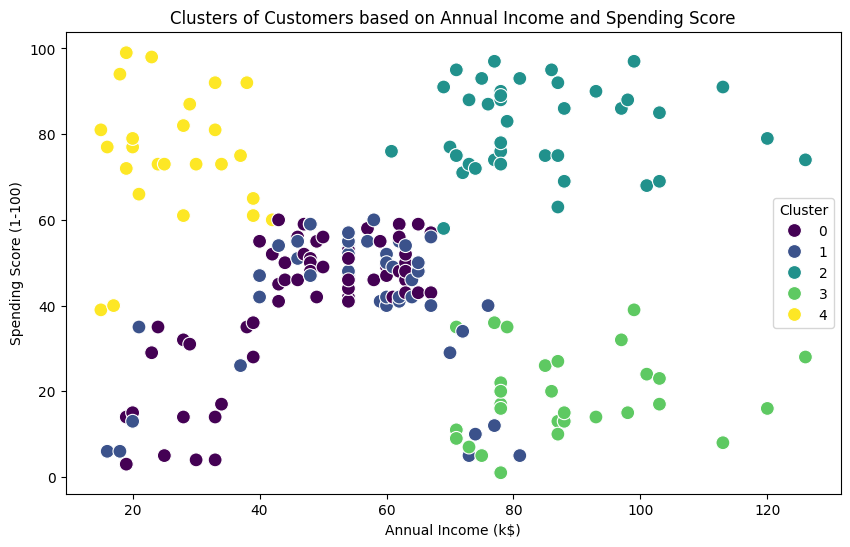

In [40]:
# Visualize clusters in 2D (choose meaningful features for axes).
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Clusters of Customers based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()


Cluster Names Assigned:
   CustomerID  Cluster                Cluster_Name
0           1        4   High Income, Low Spending
1           2        4   High Income, Low Spending
2           3        1  High Income, High Spending
3           4        4   High Income, Low Spending
4           5        4   High Income, Low Spending


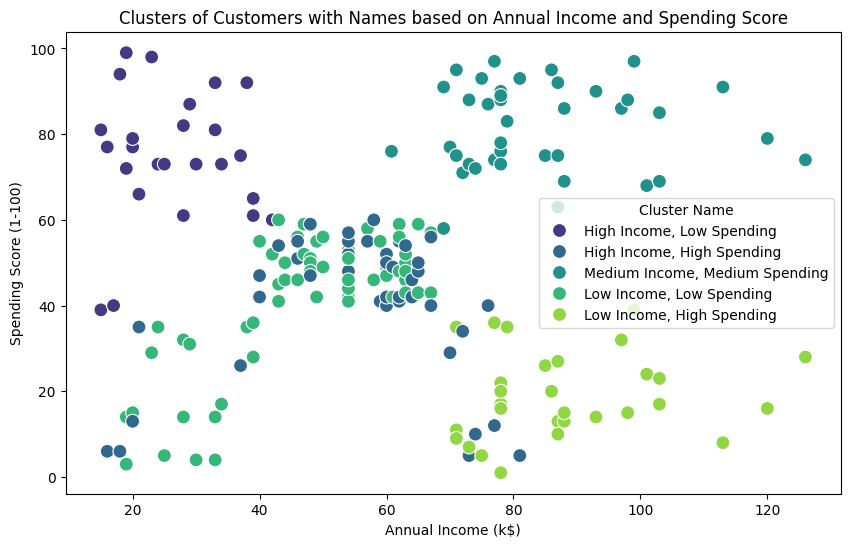

In [41]:
# naming the clusters
cluster_names = {
    0: 'Low Income, Low Spending',
    1: 'High Income, High Spending',
    2: 'Medium Income, Medium Spending',
    3: 'Low Income, High Spending',
    4: 'High Income, Low Spending'
}
# Assign names to clusters
df['Cluster_Name'] = df['Cluster'].map(cluster_names)
print("\nCluster Names Assigned:")
print(df[['CustomerID', 'Cluster', 'Cluster_Name']].head())

# plotting clusters with names
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_Name'], palette='viridis', s=100)
plt.title("Clusters of Customers with Names based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster Name')
plt.show()

## 7. Model Evaluation
Unlike classification, clustering has no accuracy score — we use Silhouette Score and interpret patterns.

In [42]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, model.labels_)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.36


In [ ]:
# Explain why Silhouette Score is used. and how to interpret it.
# The Silhouette Score is used to evaluate the quality of clusters formed by a clustering algorithm. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a score close to 1 indicates that the object is well clustered, a score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters, and a score close to -1 indicates that the object may have been assigned to the wrong cluster. A higher Silhouette Score generally indicates better-defined clusters.
# --- IGNORE ---

In [ ]:
# how to upload image into README from local
# To upload an image into a README file on platforms like GitHub, you can follow these steps:
# 1. Place the image file in the same directory as your README.md file.
# 2. Use the following Markdown syntax to embed the image:
# ![Alt text](image_filename.png)

In [43]:
# Compute silhouette score and interpret (>0.5 = good separation).
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")
if silhouette_avg > 0.5:
    print("Good separation between clusters.")
else:
    print("Poor separation between clusters, consider revisiting feature selection or scaling.")
# --- IGNORE ---

Silhouette Score: 0.41
Poor separation between clusters, consider revisiting feature selection or scaling.


In [44]:
# Profile clusters: For each cluster, find avg age, income, spending score.
cluster_profile = df.groupby('Cluster_Name').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()
print("\nCluster Profiles:")
print(cluster_profile)


Cluster Profiles:
                     Cluster_Name        Age  Annual Income (k$)  \
0      High Income, High Spending  26.545455           55.000000   
1       High Income, Low Spending  25.920000           26.480000   
2       Low Income, High Spending  44.800000           88.200000   
3        Low Income, Low Spending  54.997786           47.220339   
4  Medium Income, Medium Spending  32.675000           84.194472   

   Spending Score (1-100)  
0               41.045455  
1               74.800000  
2               18.500000  
3               41.593220  
4               81.350000  


In [ ]:
# Write marketing/business insights from the segmentation.
# The segmentation reveals distinct customer groups that can be targeted with tailored marketing strategies. For example, the 'High Income, High Spending' cluster can be targeted with premium products, while the 'Low Income, High Spending' cluster may respond well to budget-friendly promotions. Understanding these clusters allows for more effective resource allocation and personalized customer engagement.
# --- IGNORE ---

In [45]:
# Save the processed dataset with clusters
df['Cluster'] = model.labels_
df.to_csv("mall_customers_clustered.csv", index=False)
print("Processed dataset saved as mall_customers_clustered.csv")

Processed dataset saved as mall_customers_clustered.csv


In [46]:
import joblib

# Save model
joblib.dump(model, "kmeans_mall_customers.pkl")
print("Model saved as kmeans_mall_customers.pkl")

Model saved as kmeans_mall_customers.pkl


In [47]:
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


Predicted Cluster: 7


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


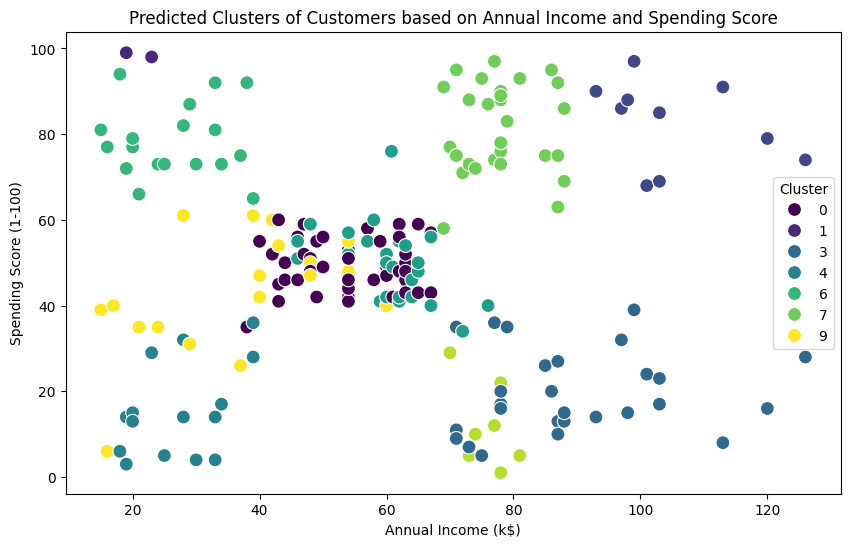

In [49]:
# Reload model and scaler
loaded_model = joblib.load("kmeans_mall_customers.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example: Transform new data and predict cluster
sample = [[35, 70, 60]]  # Age, Annual Income, Spending Score
sample_scaled = loaded_scaler.transform(sample)
pred_cluster = loaded_model.predict(sample_scaled)
print(f"Predicted Cluster: {pred_cluster[0]}")

# plotting the predicted cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Predicted Clusters of Customers based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()